In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import json
from json import loads

## 1

In [17]:
import requests
import pandas as pd

syear = 2018 
eyear = 2023  

all_data = [] 

for year in range(syear, eyear + 1):
    url = f"https://educationdata.urban.org/api/v1/college-university/ipeds/admissions-enrollment/{year}/"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        
        df = pd.DataFrame(data.get("results", []))
        all_data.append(df)
    else:
        print(f"API request failed for {year} with status code: {response.status_code}")

if all_data:
    df_final = pd.concat(all_data, ignore_index=True)

    
else:
    print("No data found for the specified unitid across the given years.")


In [18]:
# Filter by school ID
unitid = 185828
df_filtered = df_final[df_final["unitid"] == unitid]

# Group by year and sum enrollment-related columns
df_grouped = df_filtered.groupby("year").agg({
    "number_applied": "sum",
    "number_admitted": "sum",
    "number_enrolled_ft": "sum",
    "number_enrolled_pt": "sum",
    "number_enrolled_total": "sum"
}).reset_index()


df_grouped.head(5)

,year,number_applied,number_admitted,number_enrolled_ft,number_enrolled_pt,number_enrolled_total
0,2018,16246.0,10342.0,2528.0,44.0,2572.0
1,2019,16402.0,11942.0,2632.0,88.0,2720.0
2,2020,20598.0,13600.0,2260.0,122.0,2382.0
3,2021,23156.0,16010.0,2470.0,278.0,2748.0
4,2022,26020.0,17170.0,2930.0,220.0,3150.0


Level of study
<br>1—Undergraduate
<br>2—Graduate
<br>3—First professional
<br>4—Postbaccalaureate
<br>99—Total
<br>-1—Missing/not reported
<br>-2—Not applicable
<br>-3—Suppressed data

In [28]:
filepath = "Fiscal_Year_Student_Total_FTE_4Year_Institutions_data_1.csv"
full_df = pd.read_csv(filepath)
full_df.head()

,Institutional Sector,Institution Name,Unitid,Fiscal Year,Measure Names,Measure Values
0,Senior Public College/University,Kean University,185262,2021-22,Reported Total FTE students,11055.0
1,Senior Public College/University,Kean University,185262,2021-22,Total_FTE,11055.0
2,Senior Public College/University,Kean University,185262,2021-22,Reported Doctor's degree-professional practice...,158.0
3,Senior Public College/University,Kean University,185262,2021-22,Graduate FTE,1455.0
4,Senior Public College/University,Kean University,185262,2021-22,Credit hour instructional activity at the grad...,34925.0


In [29]:
institution_name = "New Jersey Institute of Technology"
df = full_df[full_df["Institution Name"] == institution_name]
df.head()

,Institutional Sector,Institution Name,Unitid,Fiscal Year,Measure Names,Measure Values
21,Senior Public College/University,New Jersey Institute of Technology,185828,2021-22,Reported Total FTE students,9673.0
22,Senior Public College/University,New Jersey Institute of Technology,185828,2021-22,Total_FTE,9673.0
23,Senior Public College/University,New Jersey Institute of Technology,185828,2021-22,Reported Doctor's degree-professional practice...,NaN
24,Senior Public College/University,New Jersey Institute of Technology,185828,2021-22,Graduate FTE,1666.0
25,Senior Public College/University,New Jersey Institute of Technology,185828,2021-22,Credit hour instructional activity at the grad...,39994.0


In [46]:
# Load the dataset
filepath = "Fiscal_Year_Student_Total_FTE_4Year_Institutions_data.csv"
df = pd.read_csv(filepath)

# Define NJIT institution name
institution_name = "New Jersey Institute of Technology"

# Step 1: Filter NJIT's data
selected_measures = ["Total_FTE", "Graduate FTE", "Undergraduate FTE"]
njit_df = df[(df["Institution Name"] == institution_name) & (df["Measure Names"].isin(selected_measures))]


NJsum_df = df[df["Measure Names"].isin(selected_measures)] \
    .groupby(["Fiscal Year", "Measure Names"])["Measure Values"].sum().reset_index()

NJsum_df.head()

,Fiscal Year,Measure Names,Measure Values
0,2022-23,Graduate FTE,43072.0
1,2022-23,Total_FTE,331308.0
2,2022-23,Undergraduate FTE,280890.0


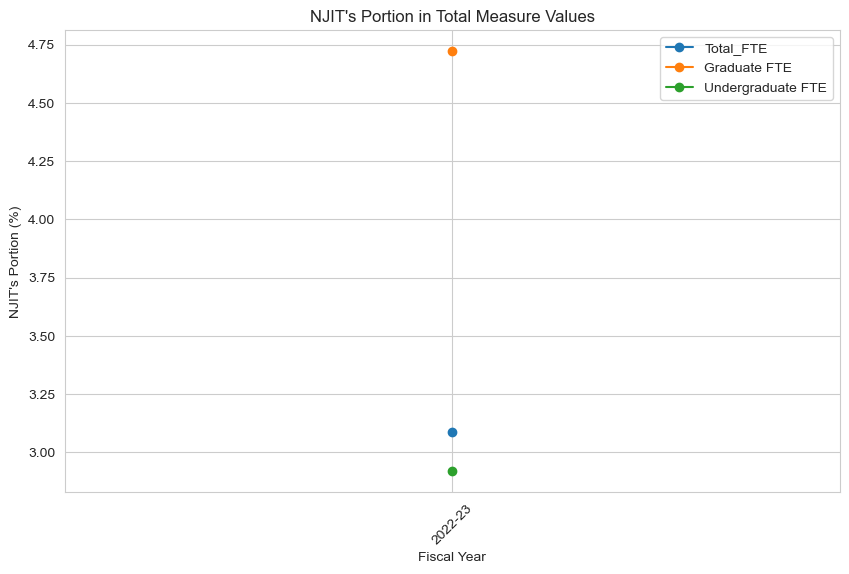

In [47]:
comparison_df = njit_df.merge(
    NJsum_df,
    on=["Fiscal Year", "Measure Names"],
    suffixes=("_NJIT", "_Total")
)

# Compute NJIT's portion as a percentage
comparison_df["Percentage_NJIT"] = (comparison_df["Measure Values_NJIT"] / comparison_df["Measure Values_Total"]) * 100

# Plot the graph
plt.figure(figsize=(10, 6))
for measure in selected_measures:
    subset = comparison_df[comparison_df["Measure Names"] == measure]
    plt.plot(subset["Fiscal Year"], subset["Percentage_NJIT"], marker='o', label=measure)

plt.xlabel("Fiscal Year")
plt.ylabel("NJIT's Portion (%)")
plt.title("NJIT's Portion in Total Measure Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [75]:
filepath = "NJ_Fall_Enrollment_Trend_by_Sector.csv"
df = pd.read_csv(filepath)
df.head()

,Year,Grand Total,County College,Senior Public (4-yr),Independent Public,Proprietary (For-Profit),Religious
0,Fall 2019,413006,137566,189641,65751,10829,9219
1,Fall 2020,395039,122004,188515,63836,10754,9930
2,Fall 2021,380914,114804,182678,63719,9400,10313
3,Fall 2022,379103,114827,180199,63450,9757,10870
4,Fall 2023,386372,119771,180598,63109,11314,11580


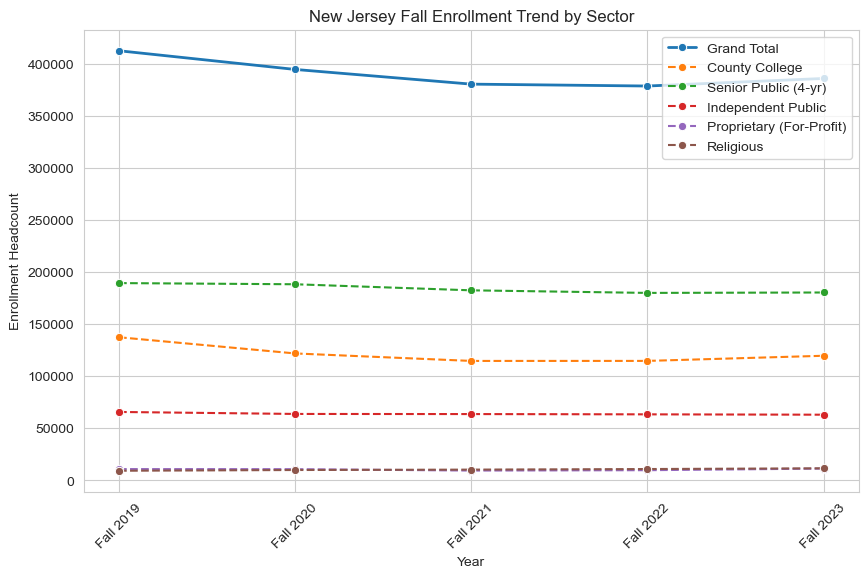

In [76]:
df['Year'] = pd.Categorical(df['Year'], categories=df['Year'], ordered=True)

# Set the Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.lineplot(x='Year', y='Grand Total', data=df, marker='o', label='Grand Total', linewidth=2)
sns.lineplot(x='Year', y='County College', data=df, marker='o', label='County College', linestyle='--')
sns.lineplot(x='Year', y='Senior Public (4-yr)', data=df, marker='o', label='Senior Public (4-yr)', linestyle='--')
sns.lineplot(x='Year', y='Independent Public', data=df, marker='o', label='Independent Public', linestyle='--')
sns.lineplot(x='Year', y='Proprietary (For-Profit)', data=df, marker='o', label='Proprietary (For-Profit)', linestyle='--')
sns.lineplot(x='Year', y='Religious', data=df, marker='o', label='Religious', linestyle='--')

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Enrollment Headcount")
plt.title("New Jersey Fall Enrollment Trend by Sector")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [85]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads

# Define the school UNITID
SCHOOL_UNITID = "100654"  # Replace with the actual institution UNITID
YEARS = range(2001, 2025) 

all_data = []

for year in YEARS:
    url = (
        f"https://educationdata.urban.org/api/v1/college-university/ipeds/admissions-enrollment/{year}/"
        f"?var=number_enrolled_totalt&unitid={SCHOOL_UNITID}"
    )
    
    try:
        response = urlopen(url)
        data = loads(response.read())

        # Convert JSON data into a DataFrame
        df = pd.DataFrame(data.get("results", []))

        # Append the data if it's not empty
        if not df.empty:
            df["year"] = year  # Add year column manually
            all_data.append(df)

    except Exception as e:
        print(f"Error fetching data for {year}: {e}")

# Combine all data into a single DataFrame

totenrolled_df = pd.concat(all_data, ignore_index=True)

# Select relevant columns and sort by year
totenrolled_df = totenrolled_df[["year", "number_enrolled_total"]].sort_values(by="year", ascending=True)

# Print or display results
totenrolled_df.head(-10)


,year,number_enrolled_total
0,2001,557
1,2001,585
2,2001,1142
3,2002,665
4,2002,760
5,2002,1425
6,2003,620
7,2003,681
8,2003,1301
9,2004,603


In [78]:
filepath = "NJ_Fall_Enrollment_Trend_by_Sector.csv"
sector_df = pd.read_csv(filepath)
sector_df.head()

sector_df["Year"] = sector_df["Year"].str.replace("Fall ", "").astype(int)  # Convert to integer (e.g., 2019)

totenrolled_df.rename(columns={"year": "Year"}, inplace=True)
totenrolled_df["Year"] = totenrolled_df["Year"].astype(int)  # Convert NJIT's year column to integer

# Merge NJIT enrollment data with total enrollment data
merged_df = pd.merge(sector_df, totenrolled_df, on="Year", how="left")

merged_df.rename(columns={"number_enrolled_total": "NJIT_enrollment"}, inplace=True)

# Display merged dataset
merged_df.head()

,Year,Grand Total,County College,Senior Public (4-yr),Independent Public,Proprietary (For-Profit),Religious,NJIT_enrollment
0,2019,413006,137566,189641,65751,10829,9219,652.0
1,2019,413006,137566,189641,65751,10829,9219,1058.0
2,2019,413006,137566,189641,65751,10829,9219,1710.0
3,2020,395039,122004,188515,63836,10754,9930,676.0
4,2020,395039,122004,188515,63836,10754,9930,988.0


C:\Users\thaou\AppData\Local\Temp\ipykernel_21924\4014884812.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x="Year", y="Enrollment Share (%)", color="blue", ci=None)


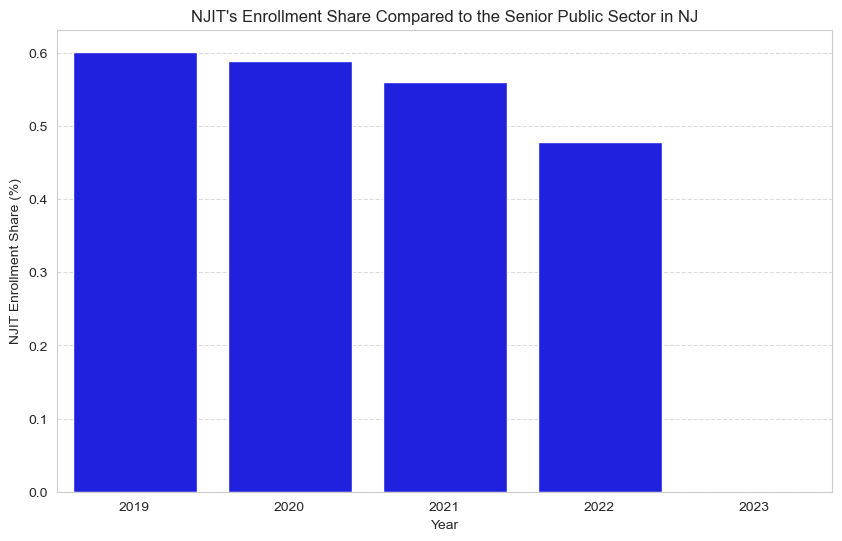

In [82]:
# Plot the enrollment share over years
# Calculate NJIT's enrollment share compared to the senior public sector
merged_df["Enrollment Share (%)"] = (merged_df["NJIT_enrollment"] / merged_df["Senior Public (4-yr)"]) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x="Year", y="Enrollment Share (%)", color="blue", ci=None)

# Enhance the visualization
plt.xlabel("Year")
plt.ylabel("NJIT Enrollment Share (%)")
plt.title("NJIT's Enrollment Share Compared to the Senior Public Sector in NJ")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

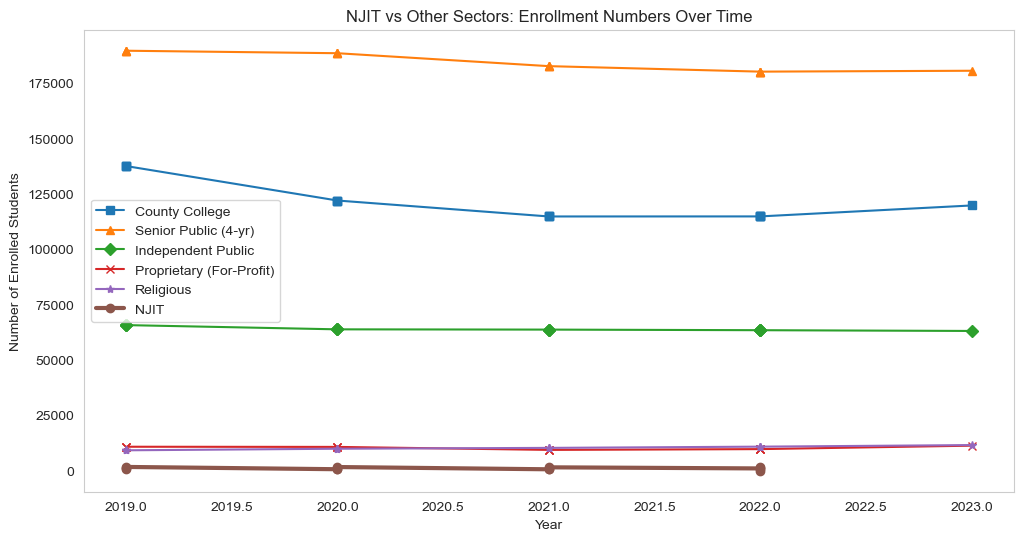

In [83]:
# Plot the actual enrollment numbers
plt.figure(figsize=(12, 6))

# plt.plot(merged_df["Year"], merged_df["Grand Total"], label="Grand Total", marker="o", linestyle="--")
plt.plot(merged_df["Year"], merged_df["County College"], label="County College", marker="s")
plt.plot(merged_df["Year"], merged_df["Senior Public (4-yr)"], label="Senior Public (4-yr)", marker="^")
plt.plot(merged_df["Year"], merged_df["Independent Public"], label="Independent Public", marker="D")
plt.plot(merged_df["Year"], merged_df["Proprietary (For-Profit)"], label="Proprietary (For-Profit)", marker="x")
plt.plot(merged_df["Year"], merged_df["Religious"], label="Religious", marker="*")
plt.plot(merged_df["Year"], merged_df["NJIT_enrollment"], label="NJIT", marker="o", linewidth=3)  # Highlight NJIT

plt.xlabel("Year")
plt.ylabel("Number of Enrolled Students")
plt.title("NJIT vs Other Sectors: Enrollment Numbers Over Time")
plt.legend()
plt.grid()
plt.show()